# Logistic regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import os

# Load the data
student_file = os.path.join("..", "data", "processed", "Merged_Final_File_Updated.xlsx")
df = pd.read_excel(student_file)

# Map dependent variable 'dropped out' to binary
df['dropped out'] = df['dropped out'].map({'no': 0, 'yes': 1})

# Define features and target
features = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade', 'education_level']
target = 'dropped out'

X = df[features]
y = df[target]

# Define preprocessing for numerical and categorical features
numerical_features = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade']
categorical_features = ['education_level']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=1)),  # Fill NA values with 1
    ('scaler', StandardScaler())
])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")

# Split the data into training and test sets for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model on the training set
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nFinal Test Set Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Cross-Validation Accuracy Scores: [0.71641791 0.70149254 0.73134328 0.83333333 0.78787879]
Mean Accuracy: 0.75
Standard Deviation: 0.05

Final Test Set Accuracy: 0.64
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.56      0.62        36
           1       0.59      0.74      0.66        31

    accuracy                           0.64        67
   macro avg       0.65      0.65      0.64        67
weighted avg       0.66      0.64      0.64        67



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import os

# Load the data
student_file = os.path.join("..", "data", "processed", "Merged_Final_File_Updated.xlsx")
df = pd.read_excel(student_file)

# Map dependent variable 'dropped out' to binary
df['dropped out'] = df['dropped out'].map({'no': 0, 'yes': 1})

# Define features and target
features = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade']
target = 'dropped out'

X = df[features]
y = df[target]

# Define preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=1)),  # Fill NA values with 1
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[('num', numerical_transformer, features)]
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")

# Split the data into training and test sets for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model on the training set
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nFinal Test Set Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Cross-Validation Accuracy Scores: [0.73134328 0.74626866 0.73134328 0.83333333 0.78787879]
Mean Accuracy: 0.77
Standard Deviation: 0.04

Final Test Set Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.61      0.67        36
           1       0.62      0.74      0.68        31

    accuracy                           0.67        67
   macro avg       0.68      0.68      0.67        67
weighted avg       0.68      0.67      0.67        67



In [ ]:
#ONLY FINAL GRADES ALL ANL's GROUPED
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import os

# Load the data
student_file = os.path.join("..", "data", "processed", "Merged_Final_File_Updated.xlsx")
df = pd.read_excel(student_file)

# Map dependent variable 'dropped out' to binary
df['dropped out'] = df['dropped out'].map({'no': 0, 'yes': 1})

# Define features and target
features = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade']
target = 'dropped out'

# Function to map grades to categories
def map_grades(grade):
    if grade <= 3:
        return 'Failed Miserably'
    elif grade <= 5.4:
        return 'Failed'
    elif grade <= 7.5:
        return 'Passed'
    else:
        return 'Passed Greatly'

# Apply the mapping to each grade feature
for feature in features:
    df[feature] = df[feature].apply(map_grades)

X = df[features]
y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),  # Fill NA values with 'Missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Convert categorical data to one-hot vectors
])

preprocessor = ColumnTransformer(
    transformers=[('cat', categorical_transformer, features)]
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500))  # Increase max_iter if needed
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.62      0.66        32
           1       0.68      0.74      0.71        35

    accuracy                           0.69        67
   macro avg       0.69      0.68      0.68        67
weighted avg       0.69      0.69      0.69        67



In [ ]:
#ONLY FIRST CHANGE EXAM GRADES FROM EACH ANL
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import os

# Load the data
student_file = os.path.join("..", "data", "processed", "Merged_Final_File_Updated.xlsx")
df = pd.read_excel(student_file)

# Map dependent variable 'dropped out' to binary
df['dropped out'] = df['dropped out'].map({'no': 0, 'yes': 1})

# Define features and target for first-time exam grades
features = ['anl1 fc grade', 'anl2 fc grade', 'anl3 fc grade', 'anl4 fc grade']
target = 'dropped out'

# Handle NaN or null by filling with 1
X = df[features].fillna(1)
y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scale data to normalize
])

preprocessor = ColumnTransformer(
    transformers=[('num', numerical_transformer, features)]
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.66      0.69        32
           1       0.71      0.77      0.74        35

    accuracy                           0.72        67
   macro avg       0.72      0.71      0.71        67
weighted avg       0.72      0.72      0.72        67



In [ ]:
#ALL FINAL GRADES + GENDER
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import os

# Load the student performance data
student_file = os.path.join("..", "data", "processed", "Merged_Final_File_Updated.xlsx")
df = pd.read_excel(student_file)

# Load the gender data
gender_file = os.path.join("..", "data", "raw", "ANL1-2020-2021 attendance.xlsx")
gender_df = pd.read_excel(gender_file)

# Merge the gender data with the main dataset
df = df.merge(gender_df[['id', 'Gender']], on='id', how='left')

# Map dependent variable 'dropped out' to binary
df['dropped out'] = df['dropped out'].map({'no': 0, 'yes': 1})

# Define features and target including the new 'Gender' feature
features = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade', 'Gender']
target = 'dropped out'

X = df[features]
y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical features
numerical_features = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade']
categorical_features = ['Gender']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=1)),  # Fill NA values with 1
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),  # Fill missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Convert categorical data to one-hot vectors
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        31
           1       0.73      0.73      0.73        37

    accuracy                           0.71        68
   macro avg       0.70      0.70      0.70        68
weighted avg       0.71      0.71      0.71        68



# Grade with VT/DT

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import os

# Load the data
student_file = os.path.join("..", "data", "processed", "Merged_Final_File_Updated.xlsx")
df = pd.read_excel(student_file)

VTDT_file = os.path.join("..", "data", "processed", "cleaned_students_vooropleiding.xlsx")
df_vtdt = pd.read_excel(VTDT_file)

# Map dependent variable 'dropped out' to binary
df['dropped out'] = df['dropped out'].map({'no': 0, 'yes': 1})

# Merge df with df_vtdt on 'id'
df = pd.merge(df, df_vtdt[['id', 'voltijd deeltijd']], on='id', how='left')

# Define features and target
features = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade', 'voltijd deeltijd']
target = 'dropped out'

X = df[features]
y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical features
numerical_features = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade']
categorical_features = ['voltijd deeltijd']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=1)),  # Fill NA values with 1
    ('scaler', StandardScaler())
])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.69      0.70        32
           1       0.72      0.74      0.73        35

    accuracy                           0.72        67
   macro avg       0.72      0.72      0.72        67
weighted avg       0.72      0.72      0.72        67



Cross-Validation Accuracy Scores: [0.73134328 0.74626866 0.73134328 0.83333333 0.78787879]
Mean Accuracy: 0.77
Standard Deviation: 0.04

Final Test Set Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.61      0.67        36
           1       0.62      0.74      0.68        31

    accuracy                           0.67        67
   macro avg       0.68      0.68      0.67        67
weighted avg       0.68      0.67      0.67        67



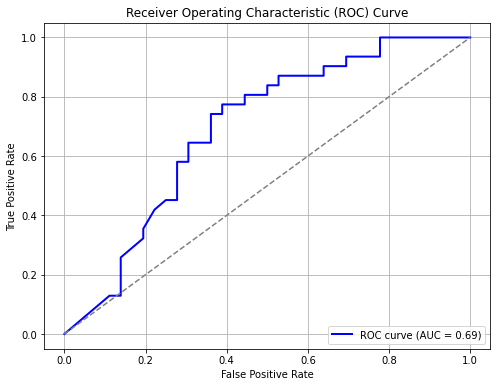

AUC: 0.69


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score
import os
import matplotlib.pyplot as plt

# Load the data
student_file = os.path.join("..", "data", "processed", "Merged_Final_File_Updated.xlsx")
df = pd.read_excel(student_file)

# Map dependent variable 'dropped out' to binary
df['dropped out'] = df['dropped out'].map({'no': 0, 'yes': 1})

# Define features and target
features = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade']
target = 'dropped out'

X = df[features]
y = df[target]

# Define preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=1)),  # Fill NA values with 1
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[('num', numerical_transformer, features)]
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model on the training set
pipeline.fit(X_train, y_train)

# Predict probabilities for the test set (probabilities for the positive class, i.e., class 1)
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no skill)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print AUC value
print(f"AUC: {auc:.2f}")
